Project Name: Plant disease detection using deep learning.


In [40]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [41]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [42]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Research and Innovation/Implementation/train'
valid_path = '/content/drive/MyDrive/Research and Innovation/Implementation/test'

In [43]:

# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [44]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [45]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Research and Innovation/Implementation/train/*')

In [46]:
folders

['/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_Septoria_leaf_spot',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_Early_blight',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_Leaf_Mold',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato__Target_Spot',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_healthy',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_Late_blight',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato__Tomato_YellowLeaf__Curl_Virus',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato__Tomato_mosaic_virus',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_Bacterial_spot',
 '/content/drive/MyDrive/Research and Innovation/Implementation/train/Tomato_Spider_mites_Two_spotted_spider_mite',
 '/content/drive/MyDrive/Resear

In [47]:

# our layers - you can add more if you want
x = Flatten()(inception.output)

In [48]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [49]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [50]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [51]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [52]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Research and Innovation/Implementation/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 16860 images belonging to 15 classes.


In [53]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Research and Innovation/Implementation/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 3778 images belonging to 15 classes.


In [54]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1054/1054 [==============================] - 6818s 6s/step - loss: 4.6194 - accuracy: 0.6907 - val_loss: 5.4759 - val_accuracy: 0.7189
Epoch 2/10
1054/1054 [==============================] - 240s 227ms/step - loss: 3.7578 - accuracy: 0.8003 - val_loss: 4.0679 - val_accuracy: 0.7980
Epoch 3/10
1054/1054 [==============================] - 237s 225ms/step - loss: 3.4161 - accuracy: 0.8330 - val_loss: 5.9349 - val_accuracy: 0.7538
Epoch 4/10
1054/1054 [==============================] - 234s 222ms/step - loss: 3.2951 - accuracy: 0.8481 - val_loss: 3.6254 - val_accuracy: 0.8489
Epoch 5/10
1054/1054 [==============================] - 233s 221ms/step - loss: 3.3435 - accuracy: 0.8603 - val_loss: 3.5734 - val_accuracy: 0.8616
Epoch 6/10
1054/1054 [==============================] - 233s 221ms/step - loss: 3.0752 - accuracy: 0.8767 - val_loss: 4.9128 - val_accuracy: 0.8293
Epoch 7/10
1054/1054 [==============================] - 233s 221ms/step - loss: 2.9390 - accuracy: 0.8828 - val_lo

In [35]:
import matplotlib.pyplot as plt

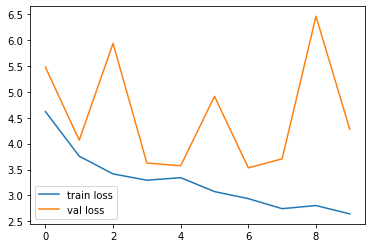

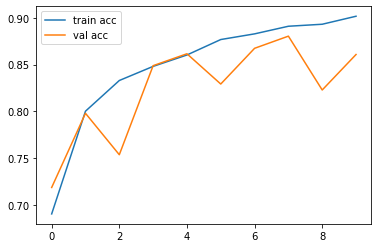

<Figure size 432x288 with 0 Axes>

In [55]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [56]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [57]:

y_pred = model.predict(test_set)

In [68]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [69]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [66]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [85]:
img_data

array([[[[-0.9952941 , -0.9958785 , -0.995817  ],
         [-0.99550945, -0.9960938 , -0.9960323 ],
         [-0.9954171 , -0.99600154, -0.99594   ],
         ...,
         [-0.99504805, -0.9956017 , -0.9956017 ],
         [-0.99517107, -0.99572474, -0.99572474],
         [-0.9952326 , -0.99578625, -0.99578625]],

        [[-0.99517107, -0.9957555 , -0.995694  ],
         [-0.9952018 , -0.99578625, -0.99572474],
         [-0.9952018 , -0.99578625, -0.99572474],
         ...,
         [-0.9950173 , -0.99557096, -0.99557096],
         [-0.9950788 , -0.99563247, -0.99563247],
         [-0.99517107, -0.99572474, -0.99572474]],

        [[-0.99504805, -0.99563247, -0.99557096],
         [-0.994925  , -0.99550945, -0.99544793],
         [-0.9949558 , -0.9955402 , -0.9954787 ],
         ...,
         [-0.9949558 , -0.99550945, -0.99550945],
         [-0.99498653, -0.9955402 , -0.9955402 ],
         [-0.99504805, -0.9956017 , -0.9956017 ]],

        ...,

        [[-0.9950173 , -0.9954787 , -0

In [77]:
img=image.load_img('/content/drive/MyDrive/Research and Innovation/Implementation/test/Pepper__bell___Bacterial_spot/01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG',target_size=(224,224))

In [76]:
x=image.img_to_array(img)
x


array([[[153., 134., 136.],
        [146., 127., 129.],
        [149., 130., 132.],
        ...,
        [161., 143., 143.],
        [157., 139., 139.],
        [155., 137., 137.]],

       [[157., 138., 140.],
        [156., 137., 139.],
        [156., 137., 139.],
        ...,
        [162., 144., 144.],
        [160., 142., 142.],
        [157., 139., 139.]],

       [[161., 142., 144.],
        [165., 146., 148.],
        [164., 145., 147.],
        ...,
        [164., 146., 146.],
        [163., 145., 145.],
        [161., 143., 143.]],

       ...,

       [[162., 147., 150.],
        [169., 154., 157.],
        [161., 146., 149.],
        ...,
        [150., 134., 137.],
        [152., 136., 139.],
        [163., 147., 150.]],

       [[168., 153., 156.],
        [173., 158., 161.],
        [166., 151., 154.],
        ...,
        [153., 137., 140.],
        [158., 142., 145.],
        [168., 152., 155.]],

       [[185., 170., 173.],
        [185., 170., 173.],
        [172., 1

In [79]:
x.shape

(224, 224, 3)

In [80]:
x=x/255

In [81]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [82]:
model.predict(img_data)

array([[8.9838782e-22, 1.8874637e-33, 5.7310042e-18, 6.9499354e-31,
        4.9380387e-34, 3.6945479e-31, 3.8820444e-04, 9.9961168e-01,
        1.8000463e-20, 8.2403083e-08, 8.0602697e-19, 1.1173037e-27,
        1.7530280e-38, 6.2819102e-22, 4.5168379e-17]], dtype=float32)

In [83]:
a=np.argmax(model.predict(img_data), axis=1)

In [84]:
a==1

array([False])

In [5]:

import tensorflow as tf

In [24]:
tf.__version__

'2.5.0'